##ABSTRACT

**This notebook consists of a Typeface based digits on which I will be training a Convoluted Neural Network model to recognize the characters. The dataset contains digits from 0 to 9 in the form of Images.**

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

**Libraries**

In [1]:
!pip install numpy==1.19.1
!pip install tensorflow==1.14.0
!pip install keras==2.2.5

##Imports

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers
from keras import models

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##IMPORT DATASET

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
path = '/content/drive/MyDrive/TMNIST_Data.csv'

In [60]:
#Reading csv into dataframe
data = pd.read_csv(path)

In [7]:
data.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [8]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.shape

(29900, 786)

##TRAIN TEST SPLIT

In [10]:
X=[]
y=[]

X = data.drop(columns = {'labels','names'},axis=1)
y = data[['labels']]

In [11]:
print(X.shape, y.shape)

(29900, 784) (29900, 1)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23920, 784)
(23920,)
(5980, 784)
(5980,)


In [14]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28)

In [15]:
print(X_train.shape)
print(X_test.shape)

(23920, 28, 28)
(5980, 28, 28)


In [16]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y.head()

,labels
0,2
1,8
2,4
3,3
4,1


##PLOT IMAGES

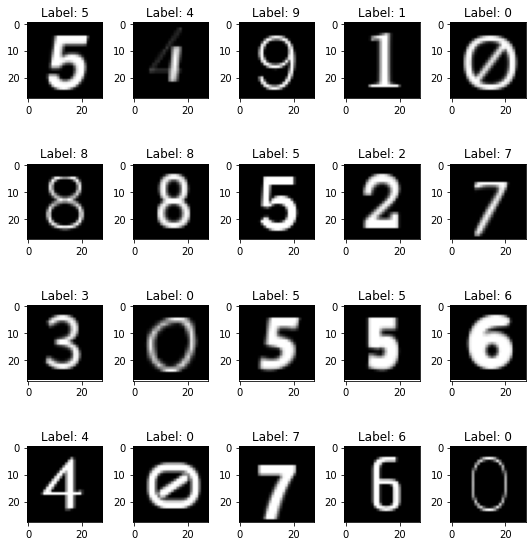

In [18]:
num = 20
images = X_train[:num]
labels = y_train[:num]

num_row = 4
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

##NORMALIZING DATA

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

**Neural Networks need normalized data, hence converting from int to float and then dividing by 255 to convert into binary digits**

In [20]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (23920, 28, 28)
Images in X_train: 23920
Images in X_test: 5980
Max value in X_train: 1.0
Min value in X_train: 0.0


In [21]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

**Reshaping the data**

In [22]:
# reshape dataset to have a single channel
X_train = X_train.reshape((23920, 28, 28, 1))
X_test = X_test.reshape((5980, 28, 28, 1))

In [23]:
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

**As the column contains multiple labels, using one hot encoding in both train and test splits**

In [24]:
# one hot encode target values
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## **Building the Model**

**CNN consists of layers:**

* **Convolutional Layer**
* **Dense Layer**
* **Pooling Layer**
* **Output Layer**


**I have used 3 Convolution Layers with filters 32 and 64 with kernels of size 3. As we have 10 output classes, I have used 2 dense layers of sizes 64 and 10.**

In [33]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

**I have usee "crossentropy" loss function alongwith "rmsprop" as the optimizer for building the CNN model. The model performance will be evaluated using the acccuracy of the predictions.**

In [42]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=11, batch_size=64)


Epoch 1/11
23920/23920 [==============================] - 22s 938us/step - loss: 0.0563 - acc: 0.9836
Epoch 2/11
23920/23920 [==============================] - 22s 915us/step - loss: 0.0512 - acc: 0.9849
Epoch 3/11
23920/23920 [==============================] - 22s 922us/step - loss: 0.0476 - acc: 0.9860
Epoch 4/11
23920/23920 [==============================] - 22s 916us/step - loss: 0.0439 - acc: 0.9868
Epoch 5/11
23920/23920 [==============================] - 22s 928us/step - loss: 0.0404 - acc: 0.9874
Epoch 6/11
23920/23920 [==============================] - 22s 932us/step - loss: 0.0391 - acc: 0.9878
Epoch 7/11
23920/23920 [==============================] - 22s 914us/step - loss: 0.0365 - acc: 0.9885
Epoch 8/11
23920/23920 [==============================] - 22s 924us/step - loss: 0.0340 - acc: 0.9896
Epoch 9/11
23920/23920 [==============================] - 22s 923us/step - loss: 0.0316 - acc: 0.9903
Epoch 10/11
23920/23920 [==============================] - 22s 918us/step - loss: 

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

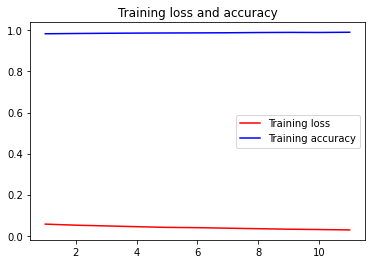

In [44]:
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training loss and accuracy')
plt.legend()
plt.show()

In [37]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy:', round(score[1]*100,2))


Model Accuracy: 98.01


##MODEL Predictions

**Using the model trained, tested for 3 samples to predict the digits**

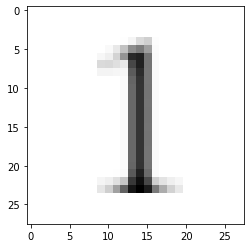

In [38]:
#Predicting a character using the trained model
idx = 2843
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [39]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  1


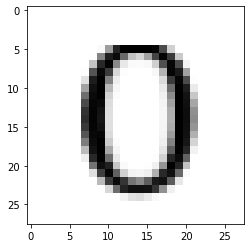

In [61]:
#Predicting a character using the trained model
idx = 2835
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [62]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  0


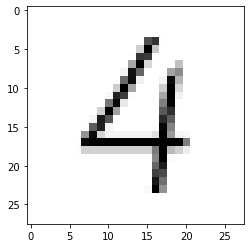

In [65]:
#Predicting a character using the trained model
idx = 2841
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [66]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  4


## CONCLUSION

**We performed Neural network to predict the digits in the TMNIST dataset. We separated the dataset into two parts, Images(X) and labels(Y). The model performed well and the model was accurate 99.1 percent of the time. After testing for several samples, the model predicted the digits correctly.**

##REFERENCES

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu/notebook

https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/

https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9

https://keras.io/api/layers/core_layers/

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

# MIT LICENSE

Copyright (c) 2022 mandardeshmukh7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.